In [1]:
from datetime import date
from datetime import datetime
today = date.today()
#size of the page = 595.27,841.89
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
from reportlab.lib.pagesizes import A4
import pandas as pd
import numpy as np
import openpyxl
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = date(2016, 12, 9)
d.strftime("%d - %B")

'09 - December'

In [3]:
class info_of_student:
    def __init__(self):
        print("name of student")
    Name = "Ki Hba Nam Jana"
    College = " GCELT"
    Year = " First"
    Month = str(today.strftime("%B"))
    Date = str(today.strftime("%d/%m/%Y"))
    Email = "sakibmondal7@gmail.com"
    Number_of_task_wins = str(5)
    Rank_among_the_class = str(5)
    Late_submition_ratio = str(.5)
    Percentage = str(100)
    Percentyle  = str(90)
    Table_elements = [["1Data Analytics",30.0,26.0,23.0,89],
                      ["2Introduction to",30.0,26.0,23.0,89],
                      ["3Data Analytics",30.0,26.0,23.0,89],
                      ["4Data Analytics",30.0,26.0,23.0,89],
                      ["5Introduction to",30.0,26.0,23.0,89]]
    Table_one_total = ["TOTAL",89,26.0,23.0,None]

In [4]:
def draw_intro(c,Spacing,info):
    c.setFont('Times-Bold',28)
    c.setFillColorRGB(0,0,0.77)
    c.drawCentredString(595.27/2+50,750,text='CampusX Mentorship Programme')
    c.setFillColorRGB(0,0,0)
    c.setFont('Times-Roman',22)
    c.drawCentredString(320,720,text='Machine Learning')
    c.setFont('Times-Roman',18)
    c.drawString(45,680,('NAME:-' + info.Name))
    c.drawString(45,680-Spacing,'COLLEGE:-'+info.College)
    #c.drawString(285,680-2*Spacing,'YEAR:-'+info.Year)
    c.drawString(45,680-2*Spacing,'MONTH:-'+info.Month)
    c.drawString(45,680-3*Spacing,'Email Address:- ' + info.Email)

    c.line(35,680-3.5*Spacing,560.27,680-3.5*Spacing)
    c.drawInlineImage(image="campusX_false_logo.png",x=45,y=700,width=85,height=100)
    c.drawInlineImage(image="Photo_InkedcampusX_false_logo_LI.jpg",x=440,y=600,width=100,height=115)
    return c

def draw_border(c,m):
    c.line(m,m,595.27-m,m)
    c.line(m,841.89-m,595.27-m,841.89-m)
    c.line(m,m,m,841.89-m)
    c.line(595.27-m,m,595.27-m,841.89-m)
    return c

def draw_table(info,c):
    c.drawInlineImage(image="TABLE_MODULES.jpg",x=45,y=410,width=500,height=180)
    c.setFont('Times-Bold',10)
    Heading = ['MODULE','Full Marks','Heighest Marks',"Your Marks",'Percentyle']
    for i in range(len(Heading)):
        c.drawCentredString(95+i*100,575,Heading[i])
    writing_row = 555
    data = info.Table_elements
    for i in range(len(info.Table_elements)):
        for j in range(len(info.Table_elements[i])):
            c.drawCentredString(95+j*100,writing_row,str(data[i][j]))   
        writing_row -= 20
    for i in range(len(info.Table_one_total)):
        if(str(info.Table_one_total[i]) == "None"):
            continue
        c.drawCentredString(95+i*100,415,str(info.Table_one_total[i])) 
    return c


def draw_acknowledgement(c,Spacing,info):
    c.line(35,45+5*Spacing,560.27,45+5*Spacing)

    c.setFont('Times-Roman',18)
    c.drawString(45,45+4*Spacing,'Number of task wins:-'+info.Number_of_task_wins)
    c.drawString(45,45+3*Spacing,'Rank among the class:-'+ info.Rank_among_the_class)
    c.drawString(45,45+2*Spacing,'Late submition ratio:-'+ info.Late_submition_ratio)
    c.drawString(45,45+Spacing,'Teacher’s signature:-')
    c.drawString(45,45,'Remark:-')


    c.drawString(300,45+4*Spacing,'Overall percentage :-'+ info.Percentage + "%")
    c.drawString(300,45+3*Spacing,'Overall1 percentyle:-'+ info.Percentyle + "%")
    c.drawString(300,45+2*Spacing,'Generated on:-'+info.Date)
    return c


def draw_comparison_table(c):
    #print(c)

    Y=160     #Y scale of the second and third graph
    c.drawInlineImage(image="july.jpg",x=45,y=Y,width=290,height=180)
    c.drawInlineImage(image="kornavai.jpg",x=350,y=Y,width=200,height=180)
    c.setFont('Times-Roman',19)
    c.drawString(45,390,'Comparison between this month and averagen till now on the ')
    c.drawString(55,370,'basic of:')
    c.drawString(65,350,'1. Task Subject:')
    c.drawString(355,350,'2. Task Value:')
    return c

def main():
    info = info_of_student
    c = canvas.Canvas("hello.pdf",bottomup=1,pagesize=A4)
    c=draw_border(c,35)
    c=draw_border(c,32.5)
    c=draw_border(c,30)

    c = draw_intro(c,25,info)
    c=draw_table(info,c)
    c=draw_comparison_table(c)
    c=draw_acknowledgement(c,22,info)
    c.showPage()
    c.save()
    #return c

In [5]:
main()

OSError: Cannot open resource "july.jpg"
fileName='july.jpg' identity=[ImageReader@0x22b72e5fe48 filename='july.jpg']

In [2]:
def creat_data(file):
    wb = openpyxl.load_workbook(file) 
    Number_of_sheets = len(wb.sheetnames)
    for i in range(len(wb.sheetnames)):
        try:
            data = pd.concat([data, pd.read_excel(file,sheet_name=i)])
        except:
            data = pd.read_excel(file,sheet_name=0)
        #print(data.shape)
    return data
def Clone_the_dataset_to_this_machine():
    a = requests.get(url)
    resp = requests.get(url)
    output = open('Student Gradebook.xlsx', 'wb')
    output.write(resp.content)
    output.close()
    
def Add_Month_column(data):
    date_list = []
    day_list = []
    year_list = []
    a=0
    for i in data["Date"]:
        try:
            date_list.append(i.strftime("%B"))
            day_list.append(i.strftime("%d"))
            year_list.append(i.strftime("%Y"))
            a  += 1
        except:
            try:
                date_list.append(datetime.strptime(str(i),"%d/%m/%Y").strftime("%B"))
                day_list.append(datetime.strptime(str(i),"%d/%m/%Y").strftime("%d"))
                year_list.append(datetime.strptime(str(i),"%d/%m/%Y").strftime("%Y"))
                a  += 1
            except:
                print("Interrupt in a line number : - ",a,"which is having a entry of:-",i)
                break

    data["Date(only)"] = day_list
    data["Month"] = date_list
    data["Year"] = year_list
    return data

In [3]:
url = "https://docs.google.com/spreadsheets/d/1HYjfEe3aCbufbqIXKs0Xz-gfoQNztGhCN1ivx0gZXnc/export?format=xlsx"    
Clone_the_dataset_to_this_machine()
data = creat_data("Student Gradebook.xlsx")
data = Add_Month_column(data)
#data.to_csv("lol.csv")

In [4]:
data.head(10)

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner,Date(only),Month,Year
0,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Chandrima,0,6.0,10,0,22,July,2019
1,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Dipam,0,7.0,10,0,22,July,2019
2,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Durga,0,6.0,10,0,22,July,2019
3,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Kaushal,0,7.0,10,0,22,July,2019
4,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Arya,0,6.0,10,0,22,July,2019
5,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Kunal,0,8.0,10,0,22,July,2019
6,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Prasoon,0,5.0,10,0,22,July,2019
7,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Purbita,0,6.0,10,0,22,July,2019
8,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Roumyak,0,6.0,10,0,22,July,2019
9,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Shakib,0,6.0,10,0,22,July,2019


In [5]:
data_backup = data
#data = data[data["Student"]=="Shakib"]

In [9]:
My_dataframe_list_for_type_column = list([])
for i in range(len(data["id"])):
    working_row = data.iloc[i].values[:]
    modifing_row = working_row[:]
    if (len(working_row[4].replace(" ","").split(",")) == 0 ):
        My_dataframe_list_for_type_column.append(modifing_row)
    else:
        types = working_row[4].replace(" ","").split(",")
        for j in types:
            modifing_row[4] = j
            append_list = modifing_row[:]
            My_dataframe_list_for_type_column.append(append_list)
            del(append_list)
            
            
my_dataframe = pd.DataFrame(My_dataframe_list_for_type_column)
my_dataframe.head()
            
        
    

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,Content,Dipam,0,7.0,10,0,22,July,2019
1,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,Content,Dipam,0,7.0,10,0,22,July,2019
2,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,Content,Dipam,0,7.0,10,0,22,July,2019
3,0,Ajkyaukhada,2019-07-22 00:00:00,Ritual,Consistency,Dipam,0,2.0,2,0,22,July,2019
4,2,Blog on Machine Learning and it's impact,2019-07-23 00:00:00,Introduction to Data Science,AnalyticalAbility,Dipam,0,16.0,25,0,23,July,2019


In [ ]:
data.head()

In [ ]:
def Give_me_first_graph_for_the_month_of(data,Month_name):
    data_for_graph_one = data.groupby("Module")['Points','Total'].sum().reset_index()
    data_for_graph_one["Percentage"] = round(data_for_graph_one["Points"] / data_for_graph_one['Total']*100)
    data_for_graph_one["For_the_month_of"] = "All"
    data_for_given_month = data[data["Month"] == Month_name]
    data_for_given_month = data_for_given_month.groupby("Module")['Points','Total'].sum().reset_index()
    data_for_given_month["Percentage"] = round(data_for_given_month["Points"] / data_for_given_month['Total']*100)
    data_for_given_month["For_the_month_of"] = str(Month_name)
    out_put_dataframe = pd.concat([data_for_given_month,data_for_graph_one])
    out_put_dataframe = out_put_dataframe[out_put_dataframe["Module"] != "Ritual"]
    plot = sns.barplot(x='Percentage',y='Module',data = out_put_dataframe,hue = 'For_the_month_of',color = "Green",)
    plot.get_figure().savefig((Month_name+".jpg"),dpi=1200,bbox_inches = 'tight')

In [ ]:
Give_me_first_graph_for_the_month_of(data,"July")

In [ ]:
#data = data_backup

In [ ]:
data.iloc[0:2]

In [6]:
backup = data

In [7]:
backup1 = backup

In [ ]:
data = backup

In [8]:
data.head(2)

,id,Task,Date,Module,Type,Student,Late Submission,Points,Total,Task Winner,Date(only),Month,Year
0,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Chandrima,0,6.0,10,0,22,July,2019
1,1,Linkedin Profile create/update,2019-07-22 00:00:00,Profile Building,"Intent, Creativity,Content",Dipam,0,7.0,10,0,22,July,2019


In [9]:
data = data[data["Student"]=="Shakib"]
data = data[data["Month"]=="August"]

In [44]:
#def Creat_spided_plot():
def return_me_the_df(data):
    My_list = []
    for i in range(len(data["id"])):
        current_row = data.iloc[i].values
        jata = [current_row[4],current_row[7],current_row[8]]
        My_list.append(jata)
    transfer = My_list 
    next_my_list = []
    for i in transfer:
        a = i
        w = a[0].replace(" ","").split(",")
        for j in w:
            one = j
            two = a[1]
            three = a[2]
            four = [one,two,three]
            next_my_list.append(four)

    spider_plot_df = pd.DataFrame(next_my_list)
    return spider_plot_df
spider_plot_df = return_me_the_df(data)
spider_plot_df.rename(columns={0:"Type",1:"Points",2:"FM"},inplace=True)
spider_plot_df_overall = return_me_the_df(backup)
spider_plot_df_overall.rename(columns={0:"Type",1:"Points",2:"FM"},inplace=True)
spider_plot_df_overall = spider_plot_df_overall[spider_plot_df_overall['Type'].isin(spider_plot_df.groupby('Type')['FM'].count().index)]
will_plot_all = spider_plot_df_overall.groupby('Type')['Points','FM'].sum().reset_index()
will_plot_all['Percentage_ALL'] = (will_plot_all['Points'] / will_plot_all['FM']*100).values
will_plot_all.drop(columns={"Points","FM"},axis = 1,inplace = True)
#spider_plot_df.merge(will_plot_all,left_on = 'Type',right_on = 'Type')



#print(spider_plot_df_overall)

marks = spider_plot_df.groupby("Type")["Points","FM"].sum().reset_index()
a = round(marks["Points"] / marks["FM"] * 100).values
marks["Percentage"] = a 
marks.index = marks["Type"]
marks.drop(columns={"Type"},axis = 1,inplace = True)
#marks= marks[marks["FM"]>marks["FM"].mean()]
labels=np.array(marks["Percentage"].index)
lol = np.array(marks["Percentage"].values,marks["Percentage_ALL"].values)
stats = marks["Percentage"].values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
#ax.set_title("Shakib")
ax.grid(True)
ax.get_figure().savefig(("kornavai"+".jpg"),dpi=1200,bbox_inches = 'tight')
print(spider_plot_df.head())

marks.head()

KeyError: 'Percentage_ALL'

In [50]:
def return_me_the_df(data):
    My_list = []
    for i in range(len(data["id"])):
        current_row = data.iloc[i].values
        jata = [current_row[4],current_row[7],current_row[8]]
        My_list.append(jata)
    transfer = My_list 
    next_my_list = []
    for i in transfer:
        a = i
        w = a[0].replace(" ","").split(",")
        for j in w:
            one = j
            two = a[1]
            three = a[2]
            four = [one,two,three]
            next_my_list.append(four)

    spider_plot_df = pd.DataFrame(next_my_list)
    spider_plot_df.rename(columns={0:"Type",1:"Points",2:"FM"},inplace=True)
    main_result = spider_plot_df.groupby("Type")["Points","FM"].sum().reset_index()
    return main_result

In [96]:
one = return_me_the_df(data)
one

,Type,Points,FM
0,Analysis,25.5,30
1,Communication,17.5,20
2,Confidence,17.5,20
3,Consistency,74.0,74
4,Creativity,17.5,20
5,Curiosity,12.0,12
6,Diligence,5.0,5
7,Hard-work,9.5,10
8,Intent,17.5,20
9,Sincerity,9.5,10


In [97]:

backup = backup[backup["Student"]=="Shakib"]
one = return_me_the_df(data)
two = return_me_the_df(backup)
two

,Type,Points,FM
0,Analysis,25.5,30
1,AnalyticalAbility,37.5,50
2,Communication,55.0,70
3,Confidence,17.5,20
4,Consistency,129.0,129
5,Content,6.0,10
6,Creativity,64.0,75
7,Curiosity,17.0,17
8,Design-sense,11.5,15
9,Diligence,5.0,5


In [98]:
one = return_me_the_df(data)
two = return_me_the_df(backup)
three = two[two['Type'].isin(one['Type'].values)]
three

,Type,Points,FM
0,Analysis,25.5,30
2,Communication,55.0,70
3,Confidence,17.5,20
4,Consistency,129.0,129
6,Creativity,64.0,75
7,Curiosity,17.0,17
9,Diligence,5.0,5
10,Hard-work,9.5,10
11,Intent,52.5,60
14,Sincerity,9.5,10


In [99]:
one = return_me_the_df(data)
two = return_me_the_df(backup)
three = two[two['Type'].isin(one['Type'].values)]
one.index = one['Type']
one.drop(columns={'Type'},inplace=True)
three.index = three['Type']
three.drop(columns={'Type'},inplace=True)
three.rename(columns={'Points':'Points_all','FM':'FM_all'},inplace=True)
four = pd.concat([one,three],axis = 1,)
four['per'] = (four['Points']/four['FM']*100).values
four['per_all'] = round(four['Points_all']/four['FM_all']*100).values
four.drop(columns={'Points','FM','Points_all','FM_all'},inplace=True)
#four.transpose()
four

,per,per_all
Type,,
Analysis,85.0,85.000000
Communication,87.5,78.571429
Confidence,87.5,87.500000
Consistency,100.0,100.000000
Creativity,87.5,85.333333
Curiosity,100.0,100.000000
Diligence,100.0,100.000000
Hard-work,95.0,95.000000
Intent,87.5,87.500000


In [102]:
four.transpose().values

array([[ 85.        ,  87.5       ,  87.5       , 100.        ,
         87.5       , 100.        , 100.        ,  95.        ,
         87.5       ,  95.        ,  85.        ,  85.        ],
       [ 85.        ,  78.57142857,  87.5       , 100.        ,
         85.33333333, 100.        , 100.        ,  95.        ,
         87.5       ,  95.        ,  85.        ,  86.15384615]])

ValueError: x and y must have same first dimension, but have shapes (13,) and (3, 12)

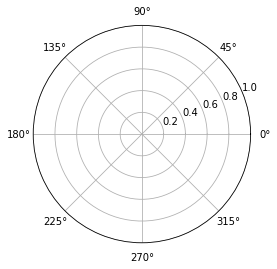

In [103]:
labels=np.array(four["per"].index)
#lol = np.array(marks["Percentage"].values,marks["Percentage_ALL"].values)
stats = four.transpose().values
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))
fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2)
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
#ax.set_title("Shakib")
ax.grid(True)

In [105]:
len(four["per"].index)

12

In [167]:
def plot(data):
    labels=np.array(data.index)
    stats=data.values
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1],labels)
    ax.plot(angles,stats[:,1],linewidth=1,color = '#80ff80',label="Average_till_now")
    ax.plot(angles,stats[:,0],linewidth=1,label="This_Month")
    ax.fill(angles, stats, 'teal', alpha=0.1)
    
    ax.set_title("")
    plt.legend(loc='lower right', bbox_to_anchor=(0.1, 0.1))
    ax.get_figure().savefig(("kornavai"+".jpg"),dpi=1200,bbox_inches = 'tight')
    plt.show()

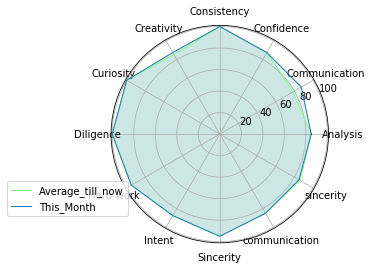

In [168]:
plot(four)

In [123]:
a = [1,2,3,4,5,6,7]
a[:2]

[1, 2]

In [119]:
from math import pi